In [1]:

import os, sys

# path2dir = '/Volumes/LaCie/sebastian/RTRBM/rtrbm_downsampled_fish4'
path2dir = os.path.dirname(os.path.dirname(os.getcwd())) # up two folders
sys.path.append(path2dir + '/code/')
sys.path.append(path2dir + '/code/boltzmann_machines/')
sys.path.append(path2dir + '/code/utils/')
sys.path.append(path2dir)

from zebrafish_rtrbm.models.RBM import RBM
from zebrafish_rtrbm.models.RTRBM import RTRBM

from zebrafish_rtrbm.utils.data_methods import reshape
from zebrafish_rtrbm.utils.metrics import get_spearmanr
from zebrafish_rtrbm.utils.metrics import kurtosis_per_t
# from data_methods import save_data

import torch
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Arial"
plt.rcParams['ytick.labelsize']=7
plt.rcParams['xtick.labelsize']=7

In [2]:
# Load performance metrics
rs_v, ssd_v, rs_vv, ssd_vv, rs_hht, ssd_hht, rmse = [np.zeros([10, 43]) for _ in range(7)]

batchsize = 35 # either 35 or 14

train_shapes = np.empty([10, 2])
test_shapes = np.empty([10, 2])

for i, downsample in enumerate(range(1, 11)):
    path2rtrbm = path2dir + f'/models/downsampled/{batchsize}/rtrbm_{downsample}_fish4_20180913_Run01'
    [rtrbm, train, test, vs_rtrbm, hs_rtrbm, ht_rtrbm, [rs_v[i, :], ssd_v[i, :], rs_vv[i, :], ssd_vv[i, :], rs_hht[i, :], ssd_hht[i, :], rmse[i, :]]] \
    = torch.load(path2rtrbm, map_location='cpu') #gpu also possible

    train_shapes[downsample-1] = np.array(train.shape)[1:]
    test_shapes[downsample-1] = np.array(test.shape)[1:]

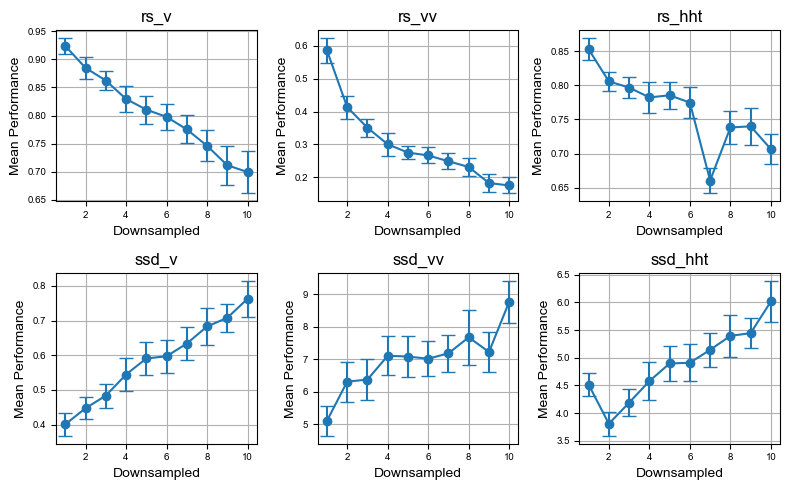

In [3]:
# Calculate means and standard deviations
downsampled_values = np.arange(1, 11)  # Downsampled values from 1 to 10
metrics = [rs_v, rs_vv, rs_hht, ssd_v, ssd_vv, ssd_hht]
means = [np.mean(metric, axis=1) for metric in metrics]
stds = [2*np.std(metric, axis=1) for metric in metrics]

# Create figure and subplots
fig, axs = plt.subplots(2, 3, figsize=(8, 5))
titles = ['rs_v', 'rs_vv', 'rs_hht', 'ssd_v', 'ssd_vv', 'ssd_hht']

# Plot data
for i, ax in enumerate(axs.flat):
    ax.errorbar(downsampled_values, means[i], yerr=stds[i], fmt='-o', capsize=5)
    #ax.scatter(downsampled_values, metrics[i])
    ax.set_title(titles[i])
    ax.set_xlabel('Downsampled')
    ax.set_ylabel('Mean Performance')
    ax.grid(True)

plt.tight_layout()
plt.show()

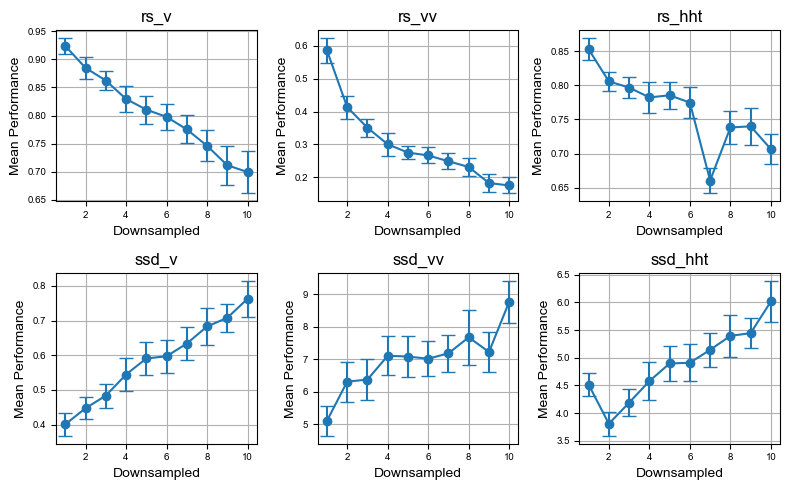

In [4]:
# Calculate means and standard deviations
downsampled_values = np.arange(1, 11)  # Downsampled values from 1 to 10
metrics = [rs_v, rs_vv, rs_hht, ssd_v, ssd_vv, ssd_hht]
means = [np.mean(metric, axis=1) for metric in metrics]
stds = [2*np.std(metric, axis=1) for metric in metrics]

# Create figure and subplots
fig, axs = plt.subplots(2, 3, figsize=(8, 5))
titles = ['rs_v', 'rs_vv', 'rs_hht', 'ssd_v', 'ssd_vv', 'ssd_hht']

# Plot data
for i, ax in enumerate(axs.flat):
    ax.errorbar(downsampled_values, means[i], yerr=stds[i], fmt='-o', capsize=5)
    #ax.scatter(downsampled_values, metrics[i])
    ax.set_title(titles[i])
    ax.set_xlabel('Downsampled')
    ax.set_ylabel('Mean Performance')
    ax.grid(True)

plt.tight_layout()
plt.show()

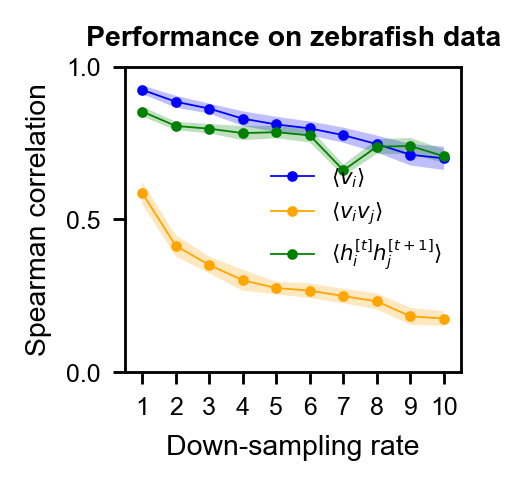

In [5]:
# Combine plots of <v>, <vv> and <hh>

# prepare Data
rs_metrics = [rs_v, rs_vv, rs_hht]

rs_means = means[:3]
ssd_means = means[3:]

rs_stds = stds[:3]
ssd_stds = stds[3:]

rs_labels = [r'$\langle v_i\rangle$', r'$\langle v_i v_j\rangle$', r'$\langle h_i^{[t]} h_j^{[t+1]} \rangle$']
ssd_labels = ['ssd_v', 'ssd_vv', 'ssd_hht']

# create a figure
fig, ax = plt.subplots(figsize = (2, 2), dpi=256)
ax.ticklabel_format(style='sci', axis='y')

# plot
ssh_colors = ['blue', 'orange', 'green']
for i, (mean, std) in enumerate(zip(rs_means, rs_stds)):
    #ax.errorbar(downsampled_values, mean, yerr=std, fmt='-o', capsize=5, color=ssh_colors[i], label=rs_labels[i], markersize=0)
    ax.fill_between(downsampled_values, mean-std, mean+std, facecolor=ssh_colors[i], alpha=0.25)
    ax.plot(downsampled_values, mean, color=ssh_colors[i], label=rs_labels[i], linewidth=0.5, marker='o', markersize=2)
ax.set_title('Performance on zebrafish data', fontsize=8, fontweight='bold')

ax.set_ylabel('Spearman correlation', fontsize=8)
ax.set_yticks(np.arange(0, 1.1, 0.5))
ax.set_ylim([0, 1])

ax.set_xlabel('Down-sampling rate', fontsize=8)
ax.set_xticks(np.arange(10) + 1)
ax.set_xlim([0.5, 10.5])


#axes[0].grid(True)
ax.legend(fontsize=6, ncols=1, frameon=False,)



plt.tight_layout()
#plt.savefig(os.path.dirname(path2dir) + '\\images\\spearman_fish4.svg')
plt.show()